# Individual source/sink component contribution to monthly dissolved Mn concentrations

May, 2019

In [134]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1a | Dust, ice, bio          | [ice](#ice)                    |
| mn_test1b | Dust, bio               | [dust](#dust)                  |
| mn_test1c | Scavenging, bio         | [scavenging](#scavenging)      |
| mn_test1d | Rivers, bio             | [rivers](#rivers)              |
| mn_test1e | Sediment diffusion, bio | [sediment diffusion](#sediment)|
| mn_test1f | Bio                     | bio                            |

In [3]:
run_folder= '/data/brogalla/run_storage/'
mn_test1b = 'mn_test1b_2019-05-17T145013.373558-0400/'
mn_test1c = 'mn_test1c_2019-05-17T145704.894654-0400/'
mn_test1d = 'mn_test1d_2019-05-17T152156.400293-0400/'
mn_test1e = 'mn_test1e_2019-05-17T170921.695627-0400/'
mn_test1f = 'mn_test1f_2019-05-17T171011.928425-0400/'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'

Mask land values

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((12, 50, 570, 600))
tmask_full_ave[:]  = tmask
tmask_full_diff    = np.zeros((10, 50, 570, 600))
tmask_full_diff[:] = tmask

In [5]:
def load_monthly(test_run, storage=run_folder, diff=monthly_diff, ave=monthly_ave, \
                 mask_ave=tmask_full_ave, mask_diff=tmask_full_diff):
    
    test_ave  = nc.Dataset(storage+test_run+ave)
    test_diff = nc.Dataset(storage+test_run+diff)
    
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    dmn_diff  = np.array(test_diff.variables['dissolmn'])
    
    #apply land mask:
    cond_ave  = (mask_ave  < 0.1) 
    cond_diff = (mask_diff < 0.1)
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    dmn_mdiff = np.ma.masked_where(cond_diff, dmn_diff[:,0,:,:,:]) 
    
    return dmn_mave, dmn_mdiff

In [6]:
#t1a_mn_ave, t1a_mn_diff = load_monthly(mn_test1a)
t1b_mn_ave, t1b_mn_diff = load_monthly(mn_test1b)
t1c_mn_ave, t1c_mn_diff = load_monthly(mn_test1c)
t1d_mn_ave, t1d_mn_diff = load_monthly(mn_test1d)
t1e_mn_ave, t1e_mn_diff = load_monthly(mn_test1e)
t1f_mn_ave, t1f_mn_diff = load_monthly(mn_test1f)

Load the lons, lats, etc.

In [7]:
ref   = nc.Dataset(run_folder+mn_test1b+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


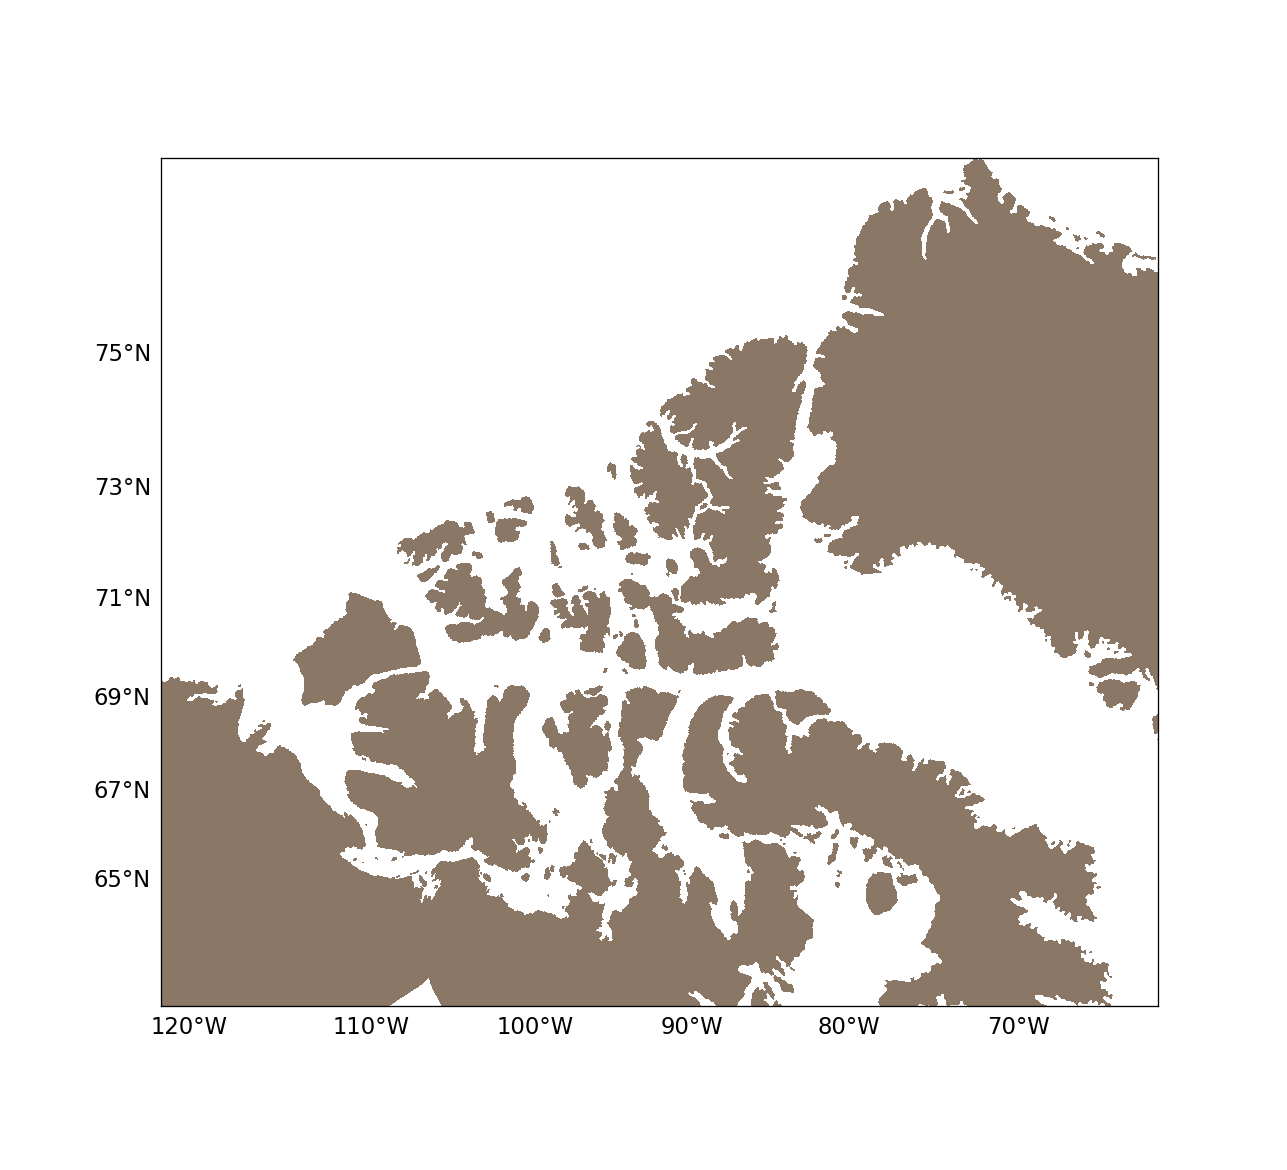

In [8]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [9]:
def months_overview(var, title, levels, min_v, max_v, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.rain
    cbar  = proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    proj.contourf(x, y, var[11, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)

    return

In [10]:
def monthly_changes(var, title, levels, min_v, max_v, proj=proj):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.rain
    proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    cbar = proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)
    
    return

<a id='ice'></a>

## Contribution of ice:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1a |  Dust, ice, bio         | ice                            |
| mn_test1b |  Dust, bio              | dust                           |

In [ ]:
# ice_ave  = t1b_mn_ave  - t1a_mn_ave
# ice_diff = t1b_mn_diff - t1a_mn_diff

In [ ]:
# print('Monthly    average               change')
# print('Max:  ', np.amax(ice_ave), '          ', np.amax(ice_diff))
# print('Min:  ', np.amin(ice_ave), '        ', np.amin(ice_diff))
# print('Ave:  ', np.average(ice_ave), ' ', np.average(ice_diff))

In [ ]:
# levels_ice_ave = [-1e-8, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10, 1e-8]
# vmin  = 0.0
# vmax  = 1e-10
# months_overview(ice_ave, 'Monthly average Mn concentration contributed by ice', levels_ice_ave, vmin, vmax)

In [ ]:
# levels_ice_diff = [-4e-11, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10]
# vmin = 0
# vmax = 1e-10
# monthly_changes(ice_diff, 'Monthly changes to Mn concentration contributed by ice', levels_ice_diff, vmin, vmax)

<a id='dust'></a>

## Contribution of dust:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1b | Dust, bio               | dust                           |
| mn_test1f | Bio                     | bio                            |

In [11]:
dust_ave  = t1f_mn_ave  - t1b_mn_ave
dust_diff = t1f_mn_diff - t1b_mn_diff

In [251]:
print('Monthly    average               change')
print('Max:  ', np.amax(dust_ave), '          ', np.amax(dust_diff))
print('Min:  ', np.amin(dust_ave), '        ', np.amin(dust_diff))
print('Ave:  ', np.average(dust_ave), ' ', np.average(dust_diff))

Monthly    average               change
Max:   8.527028e-09            7.951506e-11
Min:   -8.396242e-09          -5.7639227e-11
Ave:   1.4694328731780826e-12   2.991348837920106e-13


<IPython.core.display.Javascript object>


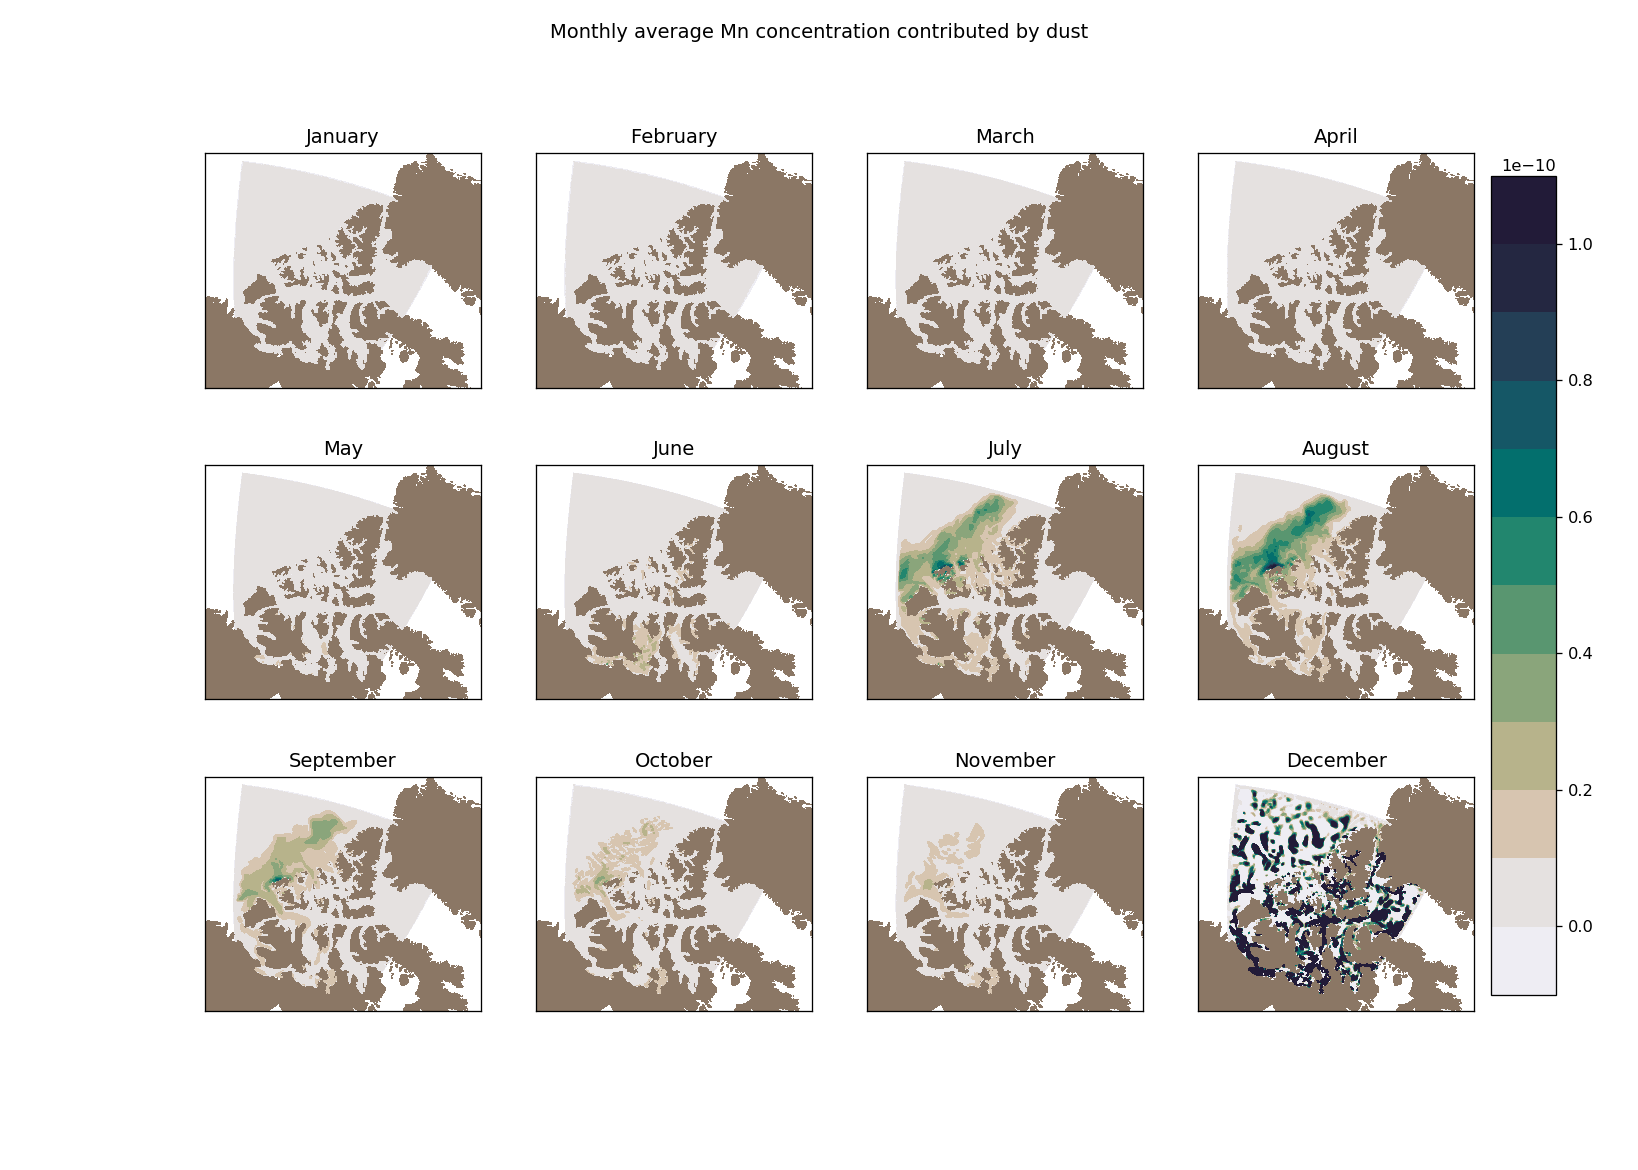

In [177]:
levels_dust_ave = [-1e-8, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10, 1e-8]
vmin  = 0.0
vmax  = 1e-10
months_overview(dust_ave, 'Monthly average Mn concentration contributed by dust', levels_dust_ave, vmin, vmax)

<IPython.core.display.Javascript object>


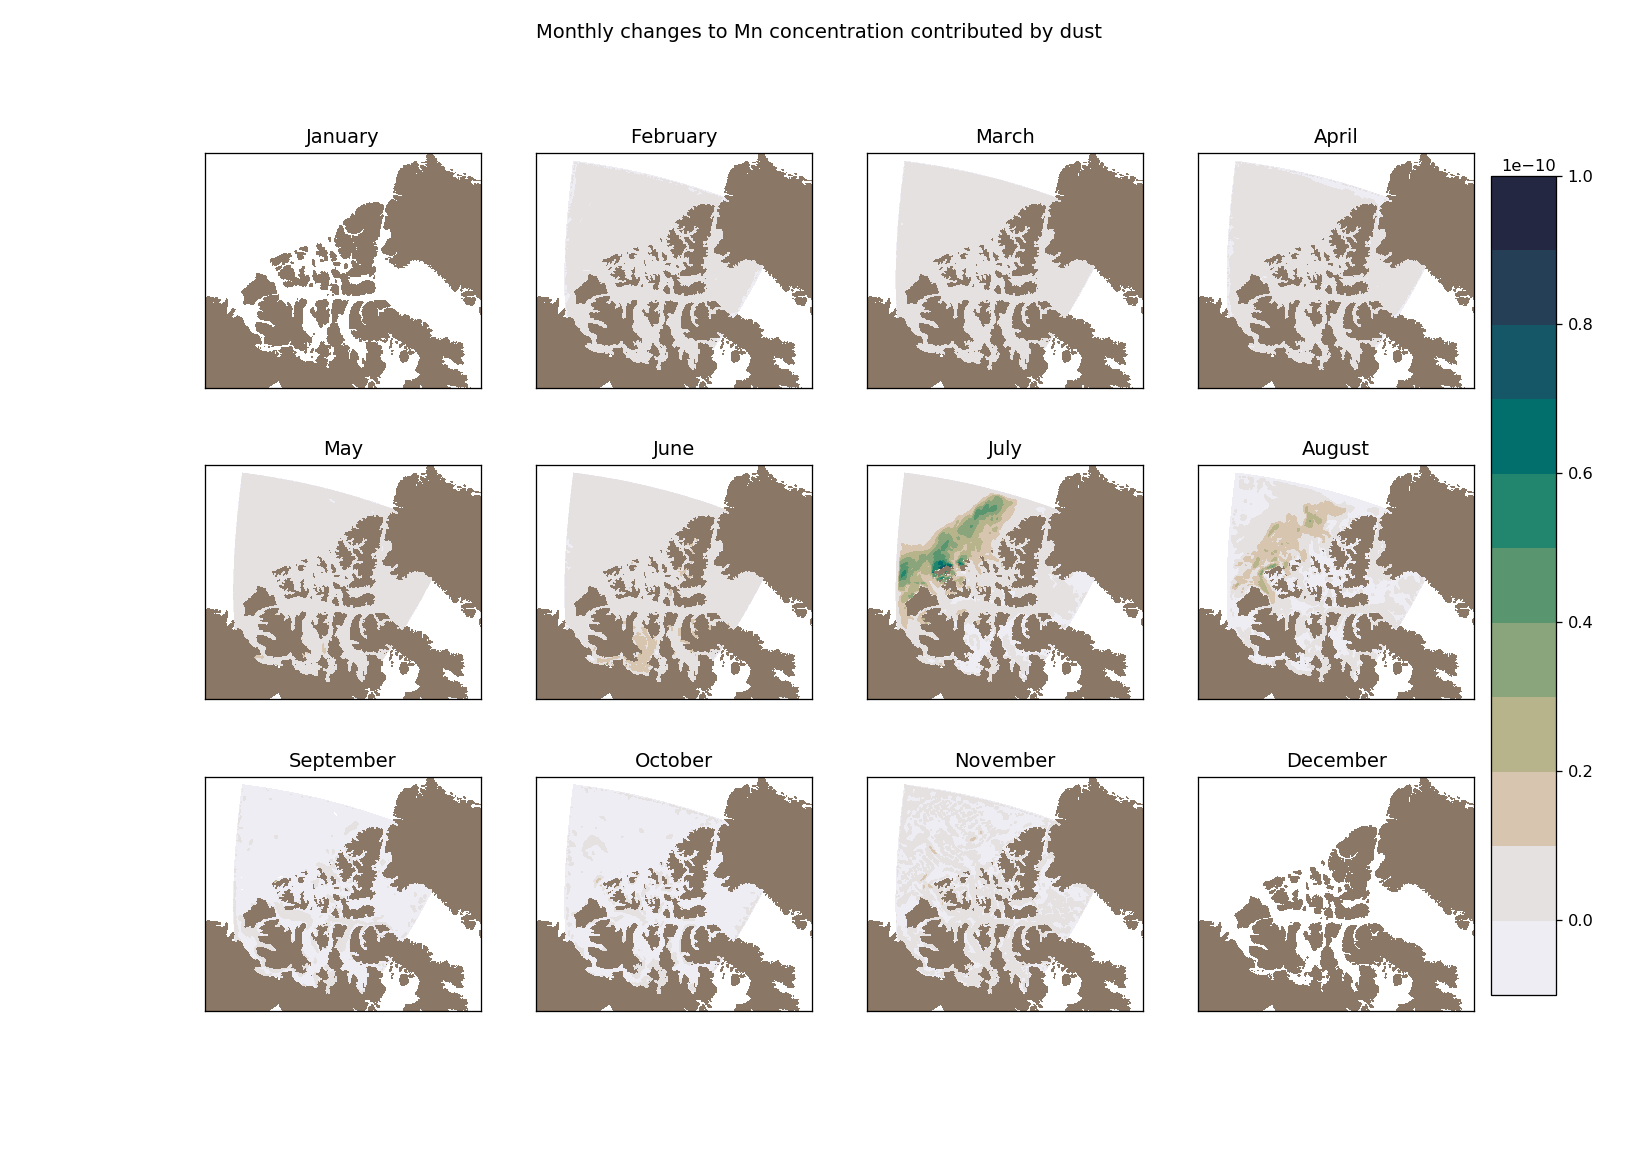

In [178]:
levels_dust_diff = [-4e-11, 0, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-10]
vmin = 0
vmax = 1e-10
monthly_changes(dust_diff, 'Monthly changes to Mn concentration contributed by dust', levels_dust_diff, vmin, vmax)

<a id='rivers'></a>

## Contribution of rivers:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1d | Rivers, bio             | rivers                         |
| mn_test1f | Bio                     | bio                            |

In [12]:
rivers_ave  = t1f_mn_ave  - t1d_mn_ave
rivers_diff = t1f_mn_diff - t1d_mn_diff

In [250]:
print('Monthly    average               change')
print('Max:  ', np.amax(rivers_ave), '          ', np.amax(rivers_diff))
print('Min:  ', np.amin(rivers_ave), '        ', np.amin(rivers_diff))
print('Ave:  ', np.average(rivers_ave), ' ', np.average(rivers_diff))

Monthly    average               change
Max:   1.7090835e-07            1.3213486e-07
Min:   -1.2320152e-09          -1.4148961e-07
Ave:   3.343295279567528e-10   5.317794038134679e-11


<IPython.core.display.Javascript object>


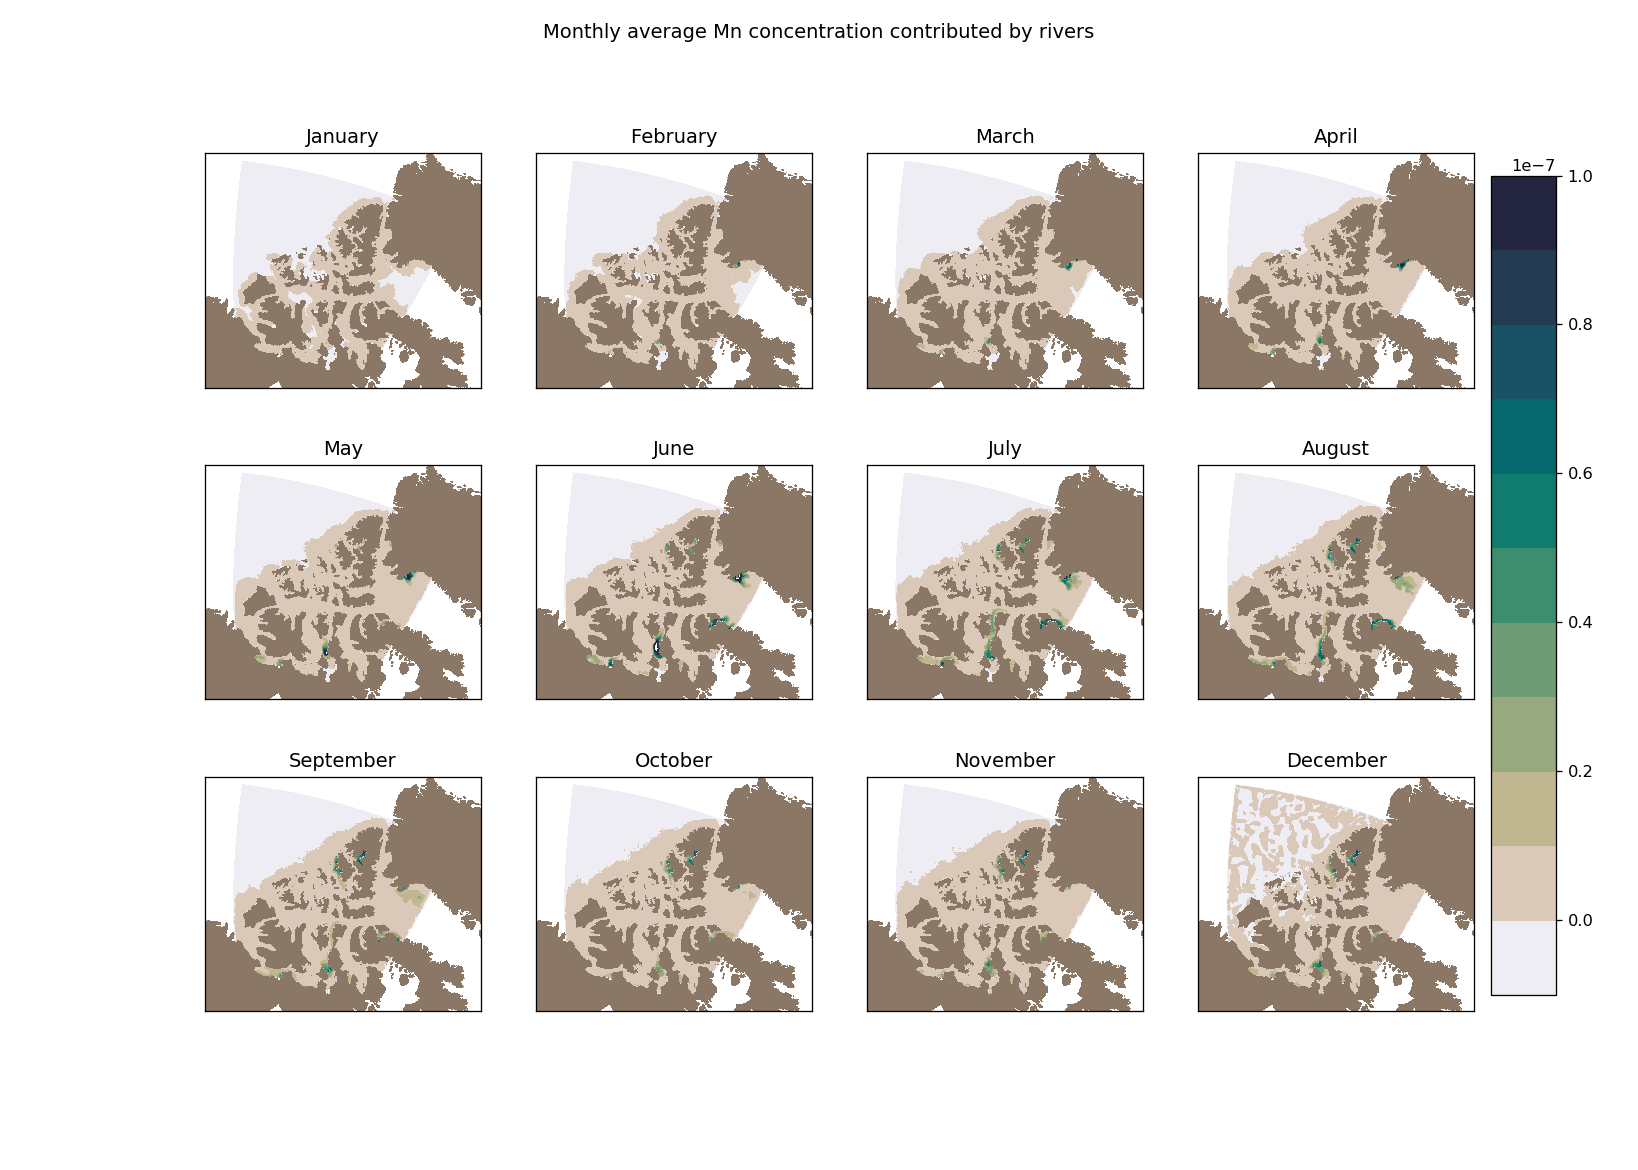

In [222]:
levels_rivers_ave = [-1e-7, 0, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(rivers_ave, 'Monthly average Mn concentration contributed by rivers', levels_rivers_ave, vmin, vmax)

<IPython.core.display.Javascript object>


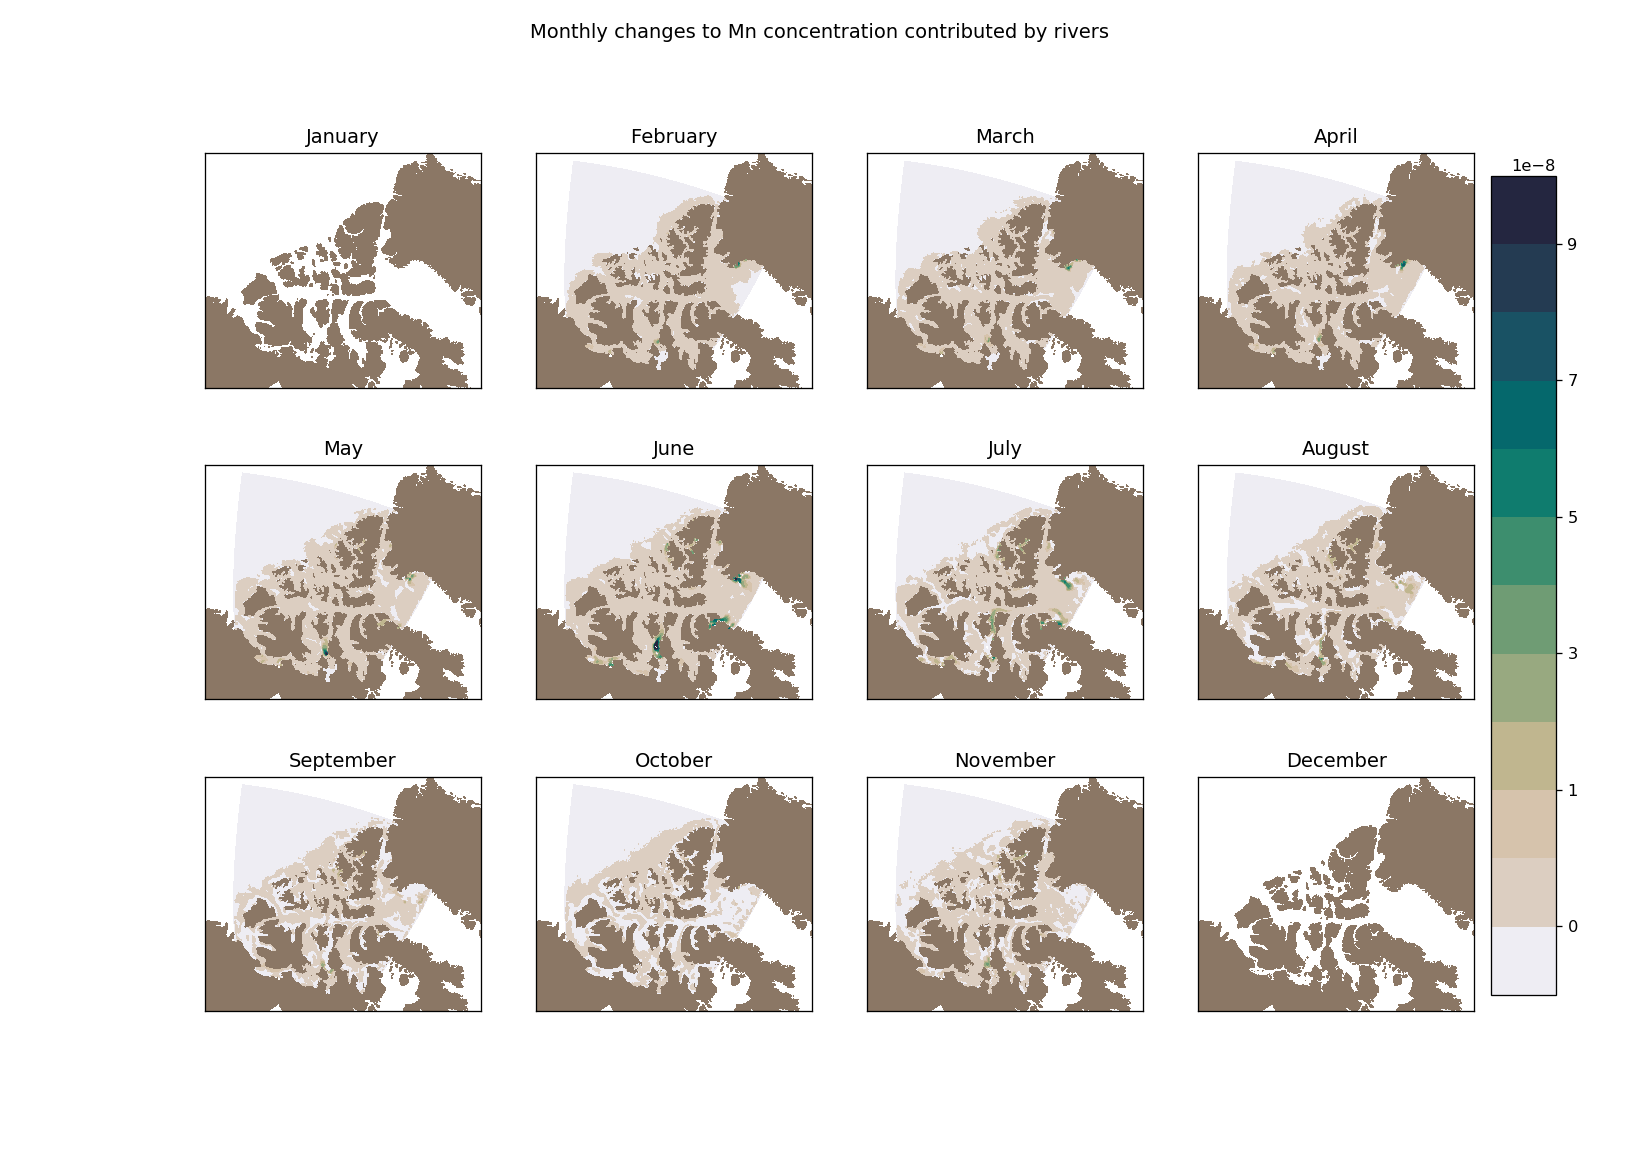

In [217]:
levels_rivers_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(rivers_diff, 'Monthly changes to Mn concentration contributed by rivers', levels_rivers_diff, vmin, vmax)

<a id='scavenging'></a>

## Contribution of scavenging:

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1c | Scavenging, bio         | scavenging                     |
| mn_test1f | Bio                     | bio                            |

In [13]:
scav_ave  = t1f_mn_ave  - t1c_mn_ave
scav_diff = t1f_mn_diff - t1c_mn_diff

In [249]:
print('Monthly    average               change')
print('Max:  ', np.amax(scav_ave), '          ', np.amax(scav_diff))
print('Min:  ', np.amin(scav_ave), '        ', np.amin(scav_diff))
print('Ave:  ', np.average(scav_ave), ' ', np.average(scav_diff))

Monthly    average               change
Max:   1.7132092e-07            1.3371886e-07
Min:   -1.2956025e-09          -1.3890718e-07
Ave:   1.2326341860260775e-09   2.676966665917931e-10


<IPython.core.display.Javascript object>


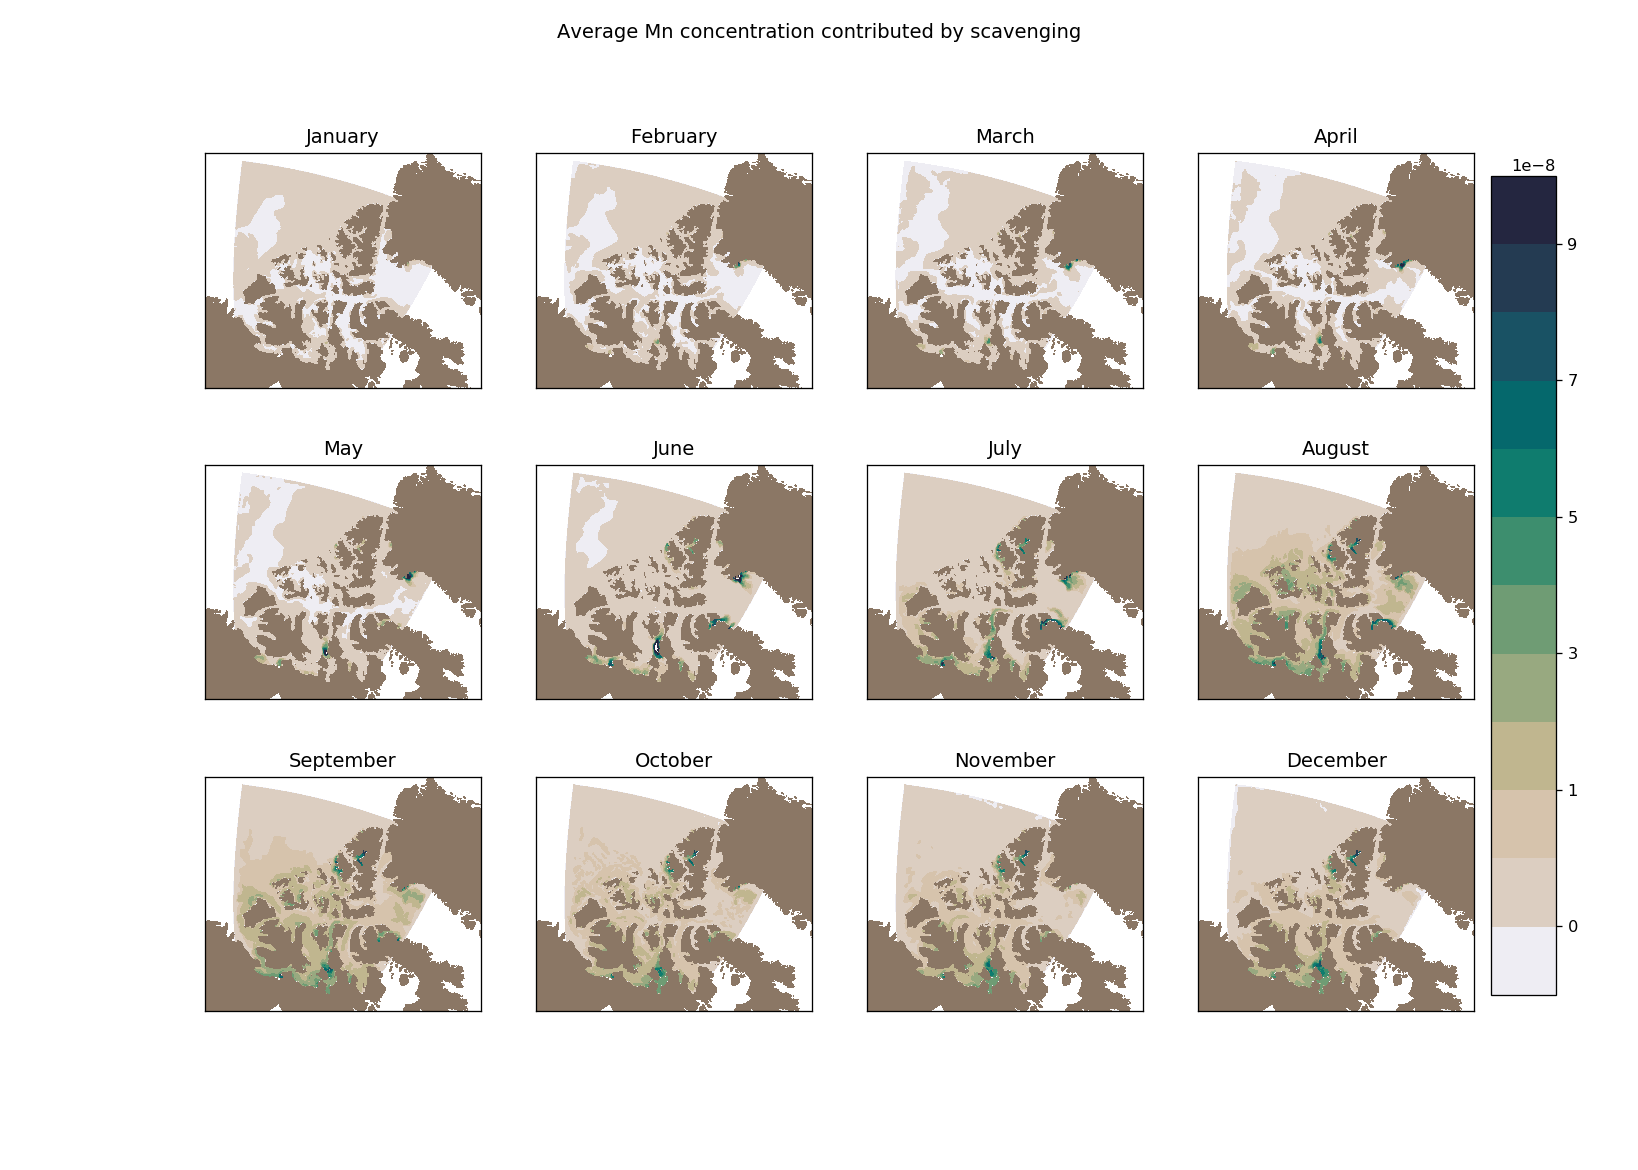

In [231]:
levels_scav_ave = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(scav_ave, 'Average Mn concentration contributed by scavenging', levels_scav_ave, vmin, vmax)

<IPython.core.display.Javascript object>


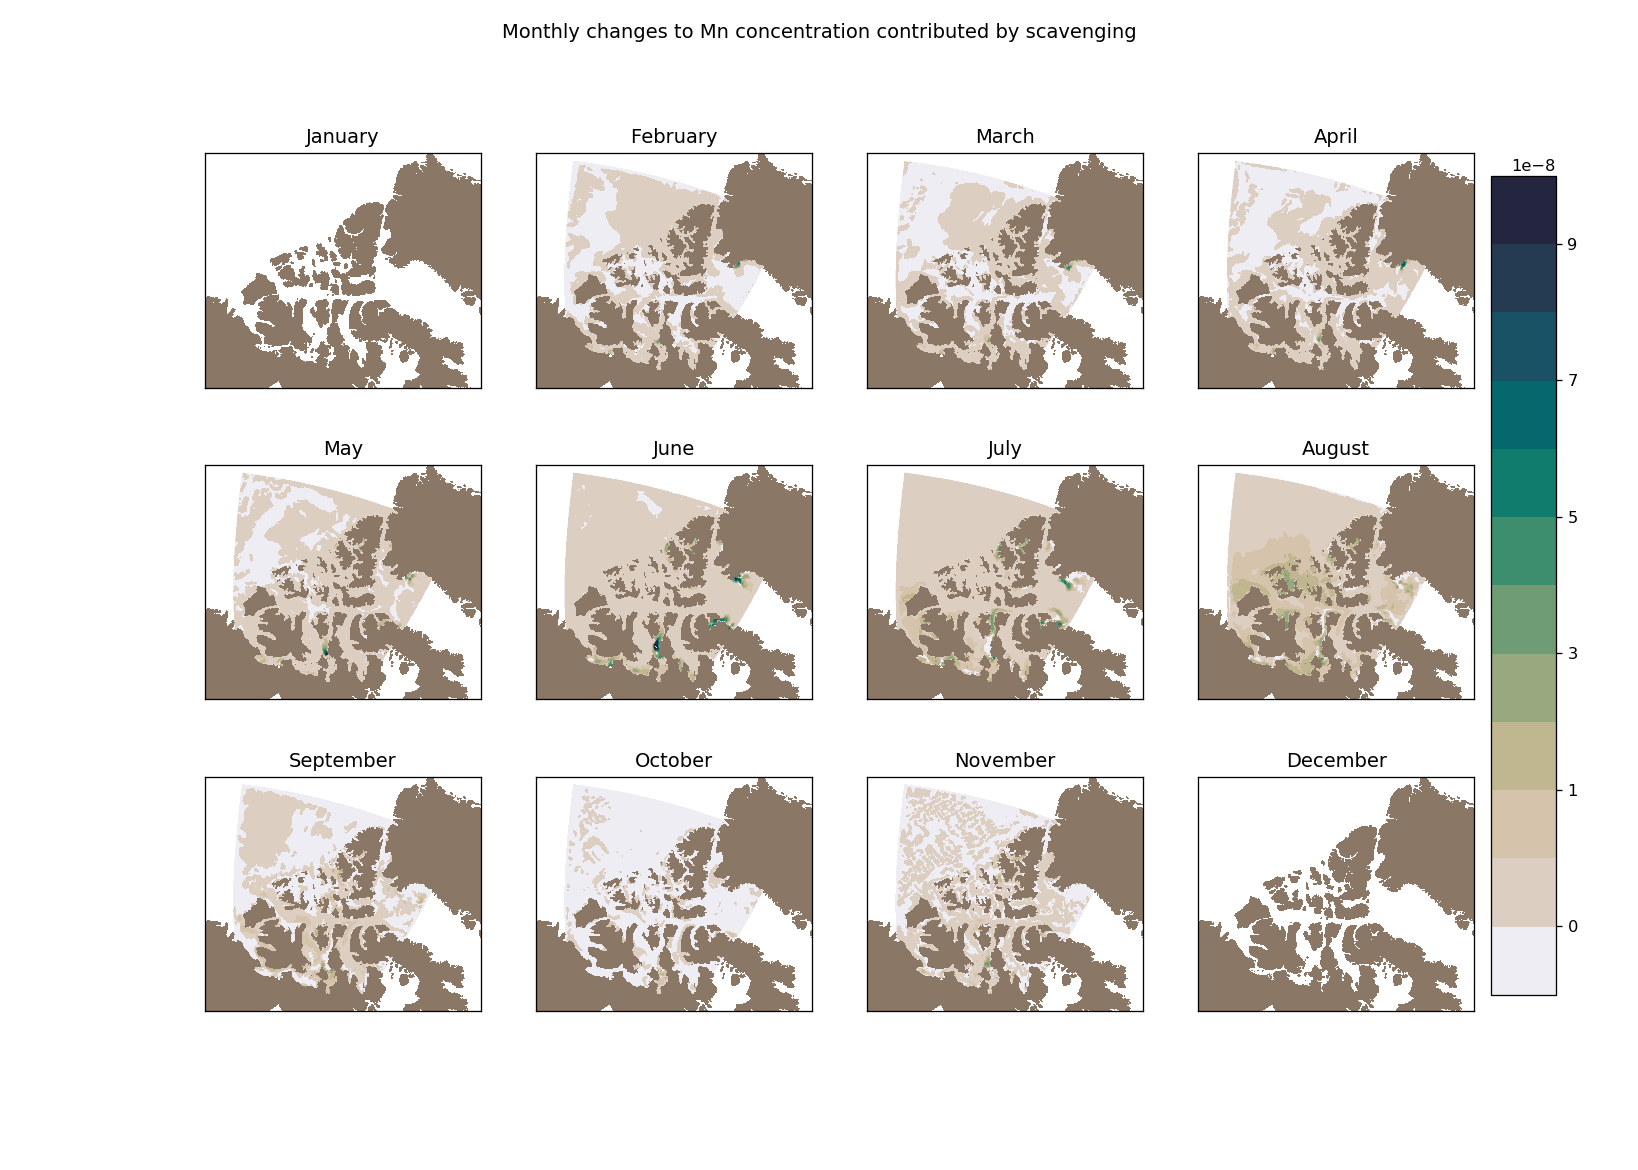

In [232]:
levels_scav_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(scav_diff, 'Monthly changes to Mn concentration contributed by scavenging', levels_scav_diff, vmin, vmax)

<a id='sediment'></a>

## Contribution of sediment diffusion (near the bottom bathymetry):

| Run ID    | Components off          | Component to isolate           |
|-----------|-------------------------|--------------------------------|
| mn_test1e | Sediment diffusion, bio | sediment diffusion             |
| mn_test1f | Bio                     | bio                            |

In [14]:
sed_ave  = t1f_mn_ave  - t1e_mn_ave
sed_diff = t1f_mn_diff - t1e_mn_diff

In [253]:
print('Monthly    average               change')
print('Max:  ', np.amax(sed_ave), '          ', np.amax(sed_diff))
print('Min:  ', np.amin(sed_ave), '        ', np.amin(sed_diff))
print('Ave:  ', np.average(sed_ave), ' ', np.average(sed_diff))

Monthly    average               change
Max:   1.110901e-08            3.0842457e-09
Min:   -1.6436097e-10          -2.908086e-09
Ave:   7.549784211298961e-11   1.2003003392238287e-11


<IPython.core.display.Javascript object>


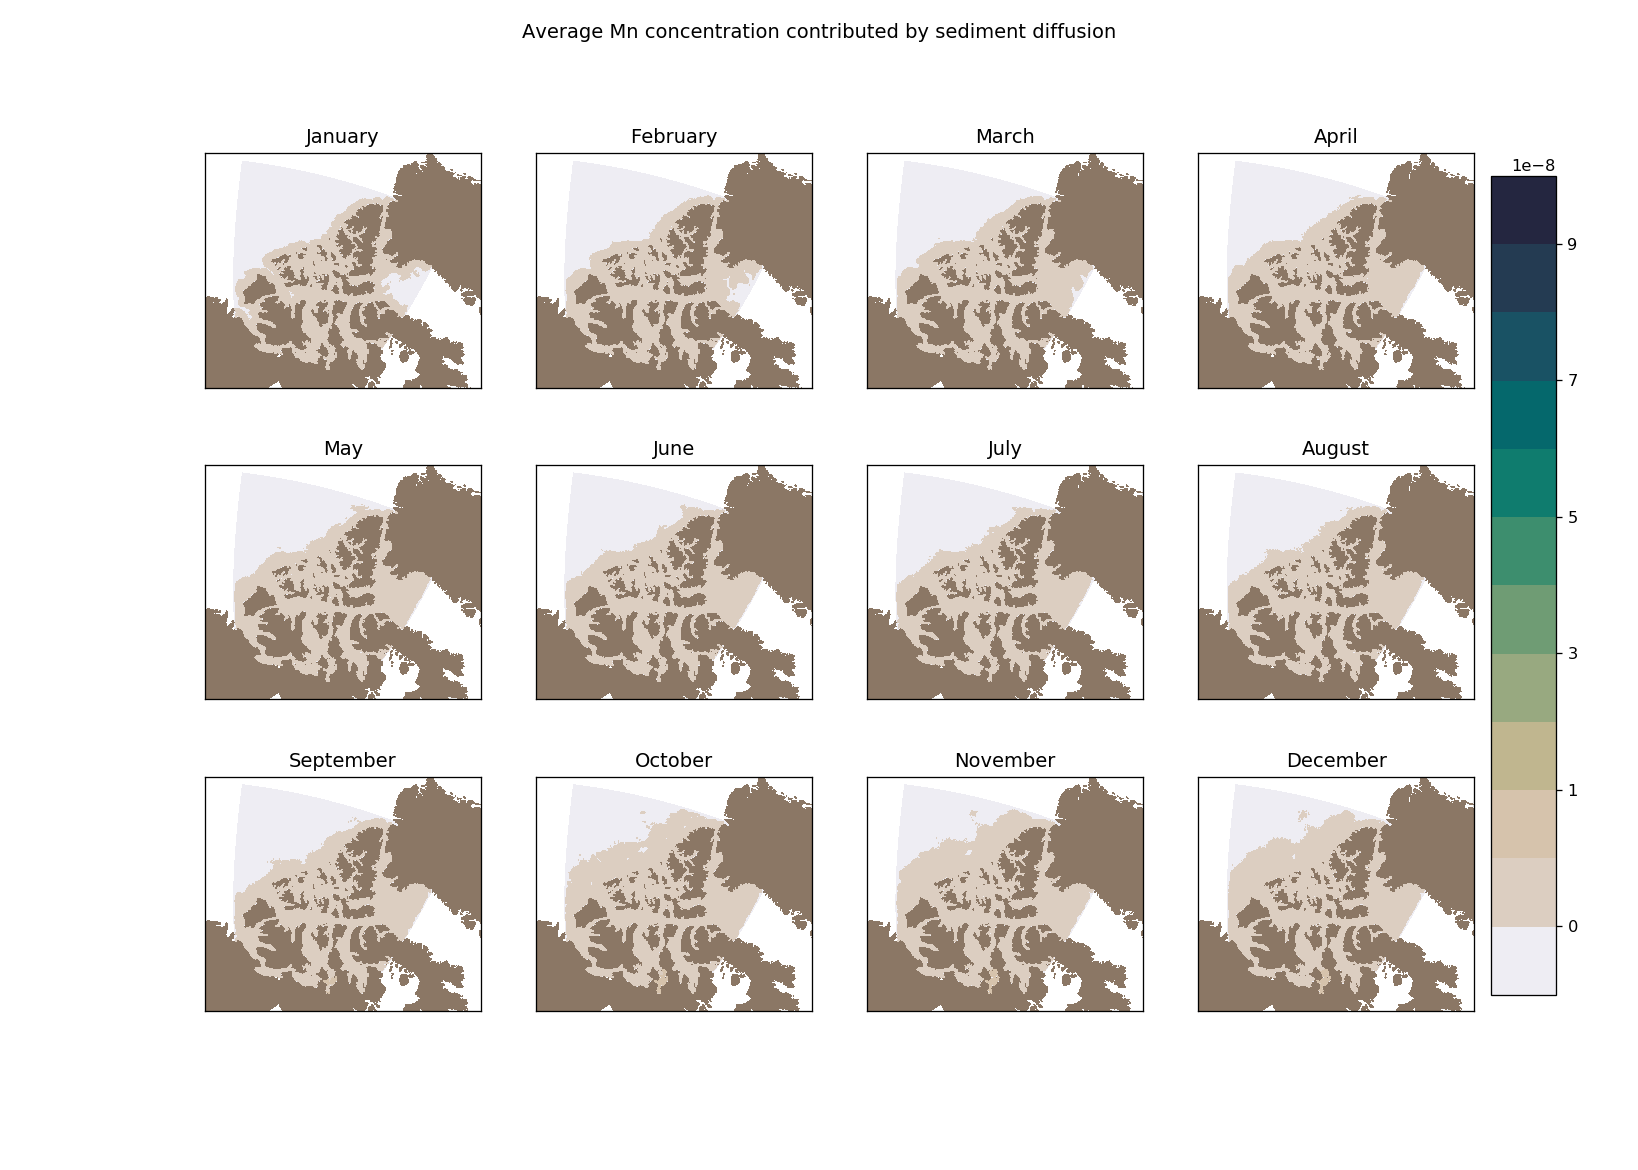

In [254]:
levels_sed_ave = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
months_overview(sed_ave, 'Average Mn concentration contributed by sediment diffusion', levels_sed_ave, vmin, vmax)

<IPython.core.display.Javascript object>


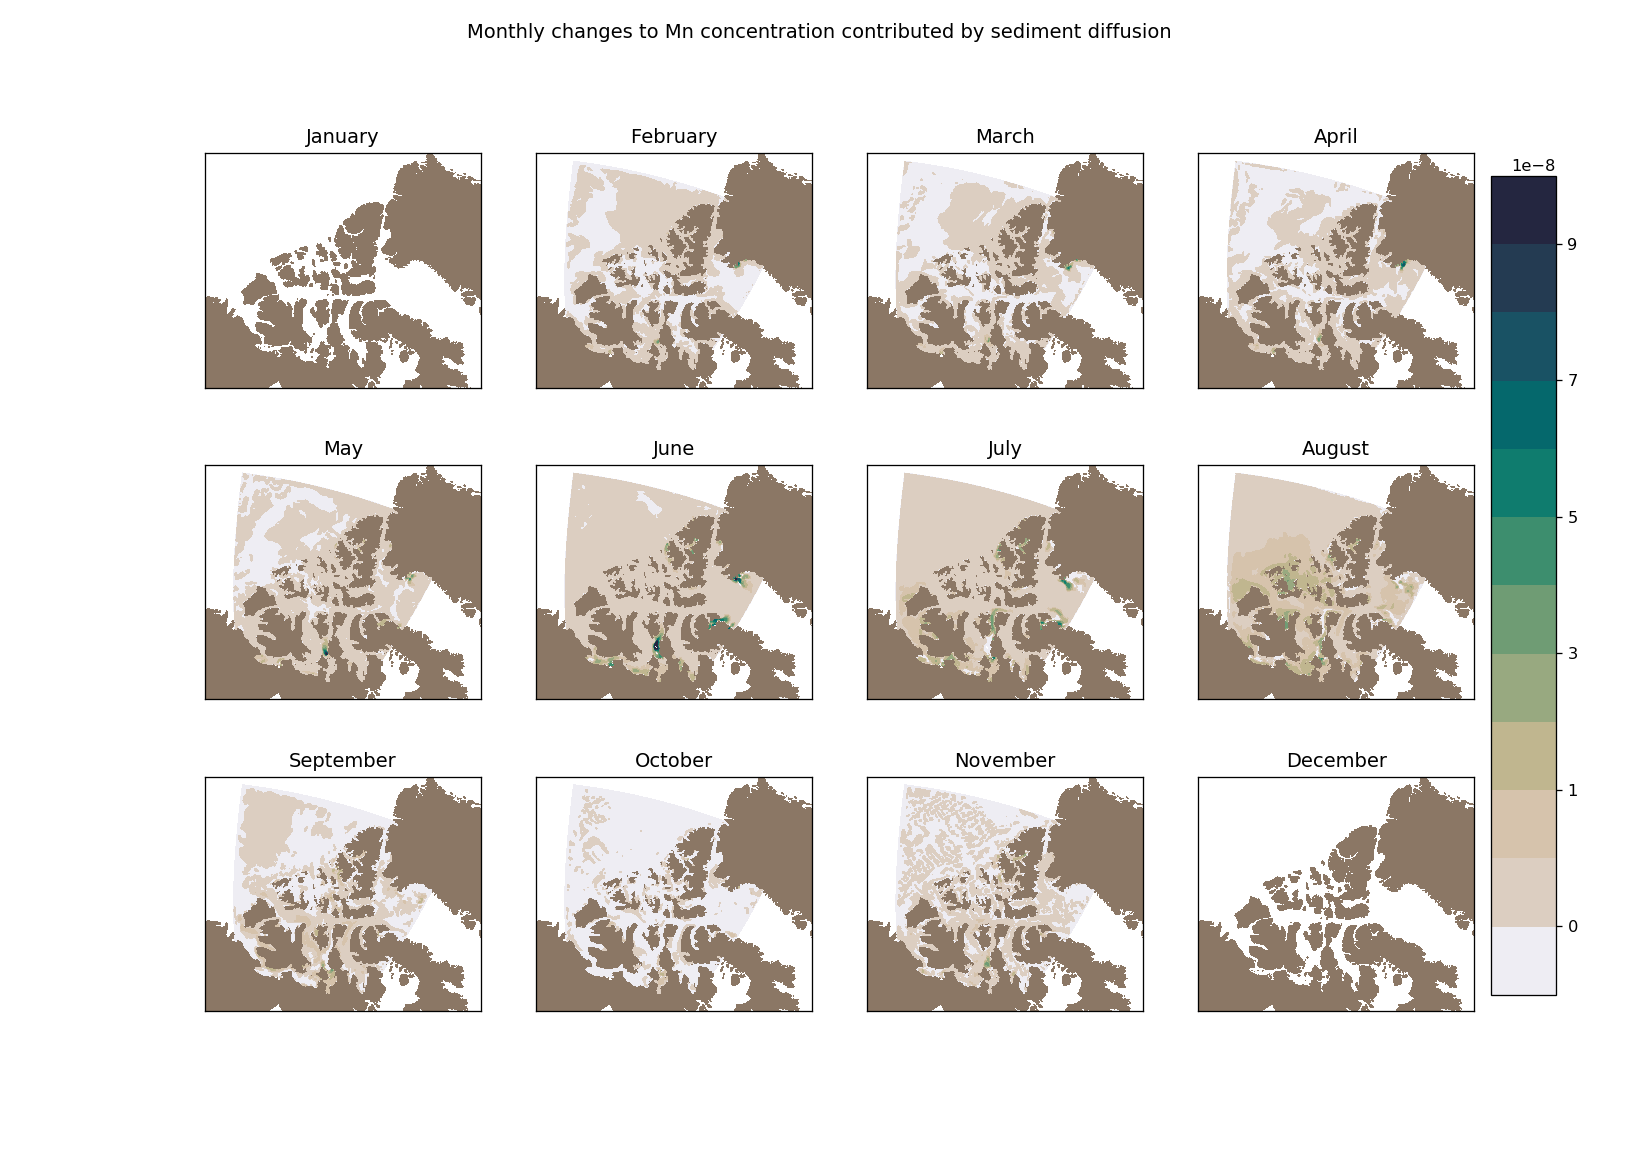

In [255]:
levels_sed_diff = [-1e-7, 0, 5e-9, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-7]
vmin=-1e-8
vmax=1e-7
monthly_changes(scav_diff, 'Monthly changes to Mn concentration contributed by sediment diffusion', \
                levels_sed_diff, vmin, vmax)

## Overall component comparison:

In [199]:
def proportions_bar(fig, ax, dust_sum_ave, rivers_sum_ave, scav_sum_ave, sed_sum_ave, title, legend=False):
    # create bar plot of proportions of components
    
    # first, calculate proportions:
    total_ave=np.zeros((12))
    for i in range(0,12):
        total_ave[i] = dust_sum_ave[i] + rivers_sum_ave[i] + scav_sum_ave[i] + sed_sum_ave[i] #+ice_sum_ave[i]
           
    dust_prop   = np.divide(dust_sum_ave, total_ave) 
    rivers_prop = np.divide(rivers_sum_ave, total_ave)
    scav_prop   = np.divide(scav_sum_ave, total_ave)
    sed_prop    = np.divide(sed_sum_ave, total_ave)
    #ice_prop    = np.divide(ice_sum_ave, total_ave)
    
    # then, plot them:    
    width = 0.8
    colors = ['#ccb598', '#007378', '#739f78', '#cc7722'] # #cee7fd dust, rivers, scavenging, sediment diffusion, ice

    months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i in range(0,12):
        ax.bar(months[i], dust_prop[i], width, color=colors[0])
        ax.bar(months[i], rivers_prop[i], width, bottom=dust_prop[i], color=colors[1])
        ax.bar(months[i], scav_prop[i], width, bottom=np.add(dust_prop[i],rivers_prop[i]), color=colors[2])
        ax.bar(months[i], sed_prop[i], width, \
               bottom=np.add(np.add(dust_prop[i], rivers_prop[i]), scav_prop[i]), color=colors[3])
        #ax.bar(months[i], ice_prop[i], width, bottom=np.add(np.add(np.add(dust_prop[i], \
        # rivers_prop[i]), scav_prop[i]),sed_prop[i]), color=colors[4])

    # for legend:
    ax.bar(months[0], dust_prop[0]  , 0, color=colors[0], label='Dust')
    ax.bar(months[0], rivers_prop[0], 0, color=colors[1], label='Rivers')
    ax.bar(months[0], scav_prop[0]  , 0, color=colors[2], label='Scavenging')
    ax.bar(months[0], sed_prop[0]   , 0, color=colors[3], label='Sediment diffusion')
#    ax.bar(months[0], ice_prop[0]   , 0, color=colors[4], label='Ice')

    xmin, xmax = ax.get_xlim()
    ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
    ax.set_title(title)
    ax.set_xlim([xmin, xmax])
    if legend:
        ax.legend()
    
    return #dust_prop, rivers_prop, scav_prop, sed_prop, ice_prop

Calculate sum of all surface grid cells each month

In [192]:
#ice_sum   = np.sum(np.sum(ice_diff[:,0,:,:],axis=1),axis=1)
dust_sum   = np.sum(np.sum(dust_diff[:,0,:,:],axis=1),axis=1)
rivers_sum = np.sum(np.sum(rivers_diff[:,0,:,:],axis=1),axis=1)
scav_sum   = np.sum(np.sum(scav_diff[:,0,:,:],axis=1),axis=1)
sed_sum    = np.sum(np.sum(sed_diff[:,0,:,:],axis=1),axis=1)

<IPython.core.display.Javascript object>


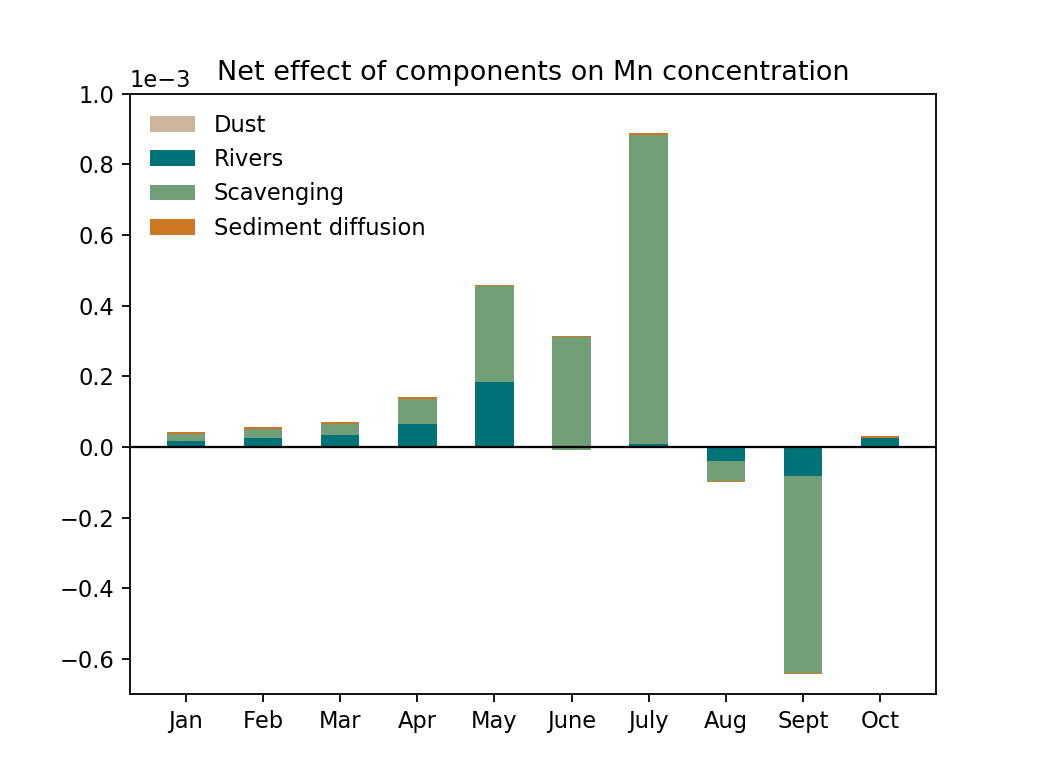

In [193]:
width = 0.5

colors = ['#ccb598', '#007378', '#739f78', '#cc7722'] # dust, rivers, scavenging, sediment diffusion

fig, ax = plt.subplots()
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']
for i in range(0,10):
    ax.bar(months[i], dust_sum[i], width, color=colors[0])
    ax.bar(months[i], rivers_sum[i], width, bottom=dust_sum[i], color=colors[1])
    ax.bar(months[i], scav_sum[i], width, bottom=np.add(dust_sum[i],rivers_sum[i]), color=colors[2])
    ax.bar(months[i], sed_sum[i], width, bottom=np.add(np.add(dust_sum[i], rivers_sum[i]),scav_sum[i]), color=colors[3])

# for legend:
ax.bar(months[0], dust_sum[0]  , 0, color=colors[0], label='Dust')
ax.bar(months[0], rivers_sum[0], 0, color=colors[1], label='Rivers')
ax.bar(months[0], scav_sum[0]  , 0, color=colors[2], label='Scavenging')
ax.bar(months[0], sed_sum[0]   , 0, color=colors[3], label='Sediment diffusion')
    
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
ax.set_title('Net effect of components on Mn concentration')
ax.set_ylim([-7e-4, 1e-3])
ax.set_xlim([xmin, xmax])
ax.legend(frameon=False)
ax.ticklabel_format(axis='y',scilimits=(-1, 1))

In [194]:
dust_sum_ave   = np.sum(np.sum(dust_ave[:,0,:,:],axis=1),axis=1)
rivers_sum_ave = np.sum(np.sum(rivers_ave[:,0,:,:],axis=1),axis=1)
scav_sum_ave   = np.sum(np.sum(scav_ave[:,0,:,:],axis=1),axis=1)
sed_sum_ave    = np.sum(np.sum(sed_ave[:,0,:,:],axis=1),axis=1)

<IPython.core.display.Javascript object>


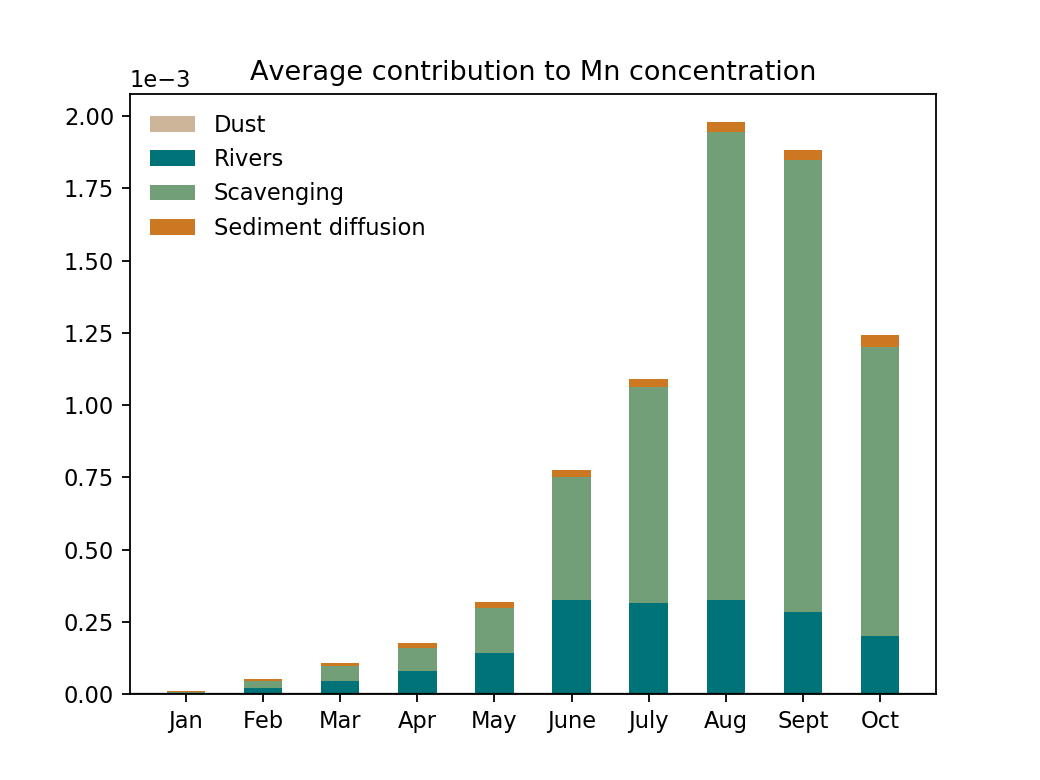

In [195]:
width = 0.5

colors = ['#ccb598', '#007378', '#739f78', '#cc7722'] # dust, rivers, scavenging, sediment diffusion

fig, ax = plt.subplots()
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']
for i in range(0,10):
    ax.bar(months[i], dust_sum_ave[i], width, color=colors[0])
    ax.bar(months[i], rivers_sum_ave[i], width, bottom=dust_sum_ave[i], color=colors[1])
    ax.bar(months[i], scav_sum_ave[i], width, bottom=np.add(dust_sum_ave[i],rivers_sum_ave[i]), color=colors[2])
    ax.bar(months[i], sed_sum_ave[i], width, bottom=np.add(np.add(dust_sum_ave[i], rivers_sum_ave[i]),scav_sum_ave[i]), color=colors[3])

# for legend:
ax.bar(months[0], dust_sum_ave[0]  , 0, color=colors[0], label='Dust')
ax.bar(months[0], rivers_sum_ave[0], 0, color=colors[1], label='Rivers')
ax.bar(months[0], scav_sum_ave[0]  , 0, color=colors[2], label='Scavenging')
ax.bar(months[0], sed_sum_ave[0]   , 0, color=colors[3], label='Sediment diffusion')
    
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax],[0, 0],'-k',linewidth=1)
ax.set_title('Average contribution to Mn concentration')
ax.set_xlim([xmin, xmax])
ax.legend(frameon=False)
ax.ticklabel_format(axis='y',scilimits=(-1, 1))

# Seperate components into water masses (roughly):

- Polar mixed layer (0-40 m)
    - PML depth levels = 1 to 17
- Pacific/halocline water (40-300 m)
    - PW depth levels = 17 to 29
- Atlantic water (300-800 m)
    - AW depth levels = 29 to 35
- Deep water (> 800 m)
    - DW depth levels = 35-50
    
Note that if a component has a negative contribution (i.e. removal), I take the absolute value of this contribution. So, what I'm really looking at is the importance of the component in the concentration/distribution of the trace metal.

In [173]:
def check_negative(dust_sum_ave, rivers_sum_ave, scav_sum_ave, sed_sum_ave):
    months = np.array(['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
    print('Net contributors to loss of dissolved Mn')
    print('Dust during months: ', months[dust_sum_ave<0])
    print('Rivers during months: ', months[rivers_sum_ave<0])
    print('Scavenging during months: ', months[scav_sum_ave<0])
    print('Sediment diffusion during months: ', months[sed_sum_ave<0])
    return

### PML

In [174]:
PML_dust_ave   = np.sum(dust_ave[:,0:17,:,:],axis=1)
PML_rivers_ave = np.sum(rivers_ave[:,0:17,:,:],axis=1)
PML_scav_ave   = np.sum(scav_ave[:,0:17,:,:],axis=1)
PML_sed_ave    = np.sum(sed_ave[:,0:17,:,:],axis=1)

In [175]:
PML_dust_sum_ave   = np.sum(np.sum(PML_dust_ave  ,axis=1), axis=1)
PML_rivers_sum_ave = np.sum(np.sum(PML_rivers_ave,axis=1), axis=1)
PML_scav_sum_ave   = np.sum(np.sum(PML_scav_ave  ,axis=1), axis=1)
PML_sed_sum_ave    = np.sum(np.sum(PML_sed_ave   ,axis=1), axis=1)

check_negative(PML_dust_sum_ave, PML_rivers_sum_ave, PML_scav_sum_ave, PML_sed_sum_ave)

PML_dust_sum_ave   = np.abs(PML_dust_sum_ave)
PML_rivers_sum_ave = np.abs(PML_rivers_sum_ave)
PML_scav_sum_ave   = np.abs(PML_scav_sum_ave)
PML_sed_sum_ave    = np.abs(PML_sed_sum_ave)

Net contributors to loss of dissolved Mn
Dust during months:  ['Dec']
Rivers during months:  []
Scavenging during months:  []
Sediment diffusion during months:  []


### PW

In [176]:
PW_dust_ave   = np.sum(dust_ave[:,17:29,:,:],axis=1)
PW_rivers_ave = np.sum(rivers_ave[:,17:29,:,:],axis=1)
PW_scav_ave   = np.sum(scav_ave[:,17:29,:,:],axis=1)
PW_sed_ave    = np.sum(sed_ave[:,17:29,:,:],axis=1)

In [177]:
PW_dust_sum_ave   = np.sum(np.sum(PW_dust_ave  ,axis=1), axis=1)
PW_rivers_sum_ave = np.sum(np.sum(PW_rivers_ave,axis=1), axis=1)
PW_scav_sum_ave   = np.sum(np.sum(PW_scav_ave  ,axis=1), axis=1)
PW_sed_sum_ave    = np.sum(np.sum(PW_sed_ave   ,axis=1), axis=1)

check_negative(PW_dust_sum_ave, PW_rivers_sum_ave, PW_scav_sum_ave, PW_sed_sum_ave)

PW_dust_sum_ave   = np.abs(PW_dust_sum_ave)
PW_rivers_sum_ave = np.abs(PW_rivers_sum_ave)
PW_scav_sum_ave   = np.abs(PW_scav_sum_ave)
PW_sed_sum_ave    = np.abs(PW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Dust during months:  []
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'June']
Sediment diffusion during months:  []


### AW

In [178]:
AW_dust_ave   = np.sum(dust_ave[:,29:35,:,:],axis=1)
AW_rivers_ave = np.sum(rivers_ave[:,29:35,:,:],axis=1)
AW_scav_ave   = np.sum(scav_ave[:,29:35,:,:],axis=1)
AW_sed_ave    = np.sum(sed_ave[:,29:35,:,:],axis=1)

In [179]:
AW_dust_sum_ave   = np.sum(np.sum(AW_dust_ave  ,axis=1), axis=1)
AW_rivers_sum_ave = np.sum(np.sum(AW_rivers_ave,axis=1), axis=1)
AW_scav_sum_ave   = np.sum(np.sum(AW_scav_ave  ,axis=1), axis=1)
AW_sed_sum_ave    = np.sum(np.sum(AW_sed_ave   ,axis=1), axis=1)

check_negative(AW_dust_sum_ave, AW_rivers_sum_ave, AW_scav_sum_ave, AW_sed_sum_ave)

AW_dust_sum_ave   = np.abs(AW_dust_sum_ave)
AW_rivers_sum_ave = np.abs(AW_rivers_sum_ave)
AW_scav_sum_ave   = np.abs(AW_scav_sum_ave)
AW_sed_sum_ave    = np.abs(AW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Dust during months:  []
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept']
Sediment diffusion during months:  []


### DW

In [180]:
DW_dust_ave   = np.sum(dust_ave[:,35:50,:,:],axis=1)
DW_rivers_ave = np.sum(rivers_ave[:,35:50,:,:],axis=1)
DW_scav_ave   = np.sum(scav_ave[:,35:50,:,:],axis=1)
DW_sed_ave    = np.sum(sed_ave[:,35:50,:,:],axis=1)

In [181]:
DW_dust_sum_ave   = np.sum(np.sum(DW_dust_ave  ,axis=1), axis=1)
DW_rivers_sum_ave = np.sum(np.sum(DW_rivers_ave,axis=1), axis=1)
DW_scav_sum_ave   = np.sum(np.sum(DW_scav_ave  ,axis=1), axis=1)
DW_sed_sum_ave    = np.sum(np.sum(DW_sed_ave   ,axis=1), axis=1)

check_negative(DW_dust_sum_ave, DW_rivers_sum_ave, DW_scav_sum_ave, DW_sed_sum_ave)

DW_dust_sum_ave   = np.abs(DW_dust_sum_ave)
DW_rivers_sum_ave = np.abs(DW_rivers_sum_ave)
DW_scav_sum_ave   = np.abs(DW_scav_sum_ave)
DW_sed_sum_ave    = np.abs(DW_sed_sum_ave)

Net contributors to loss of dissolved Mn
Dust during months:  ['Feb' 'Apr']
Rivers during months:  []
Scavenging during months:  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']
Sediment diffusion during months:  []


### Overview of the water masses together:

<IPython.core.display.Javascript object>


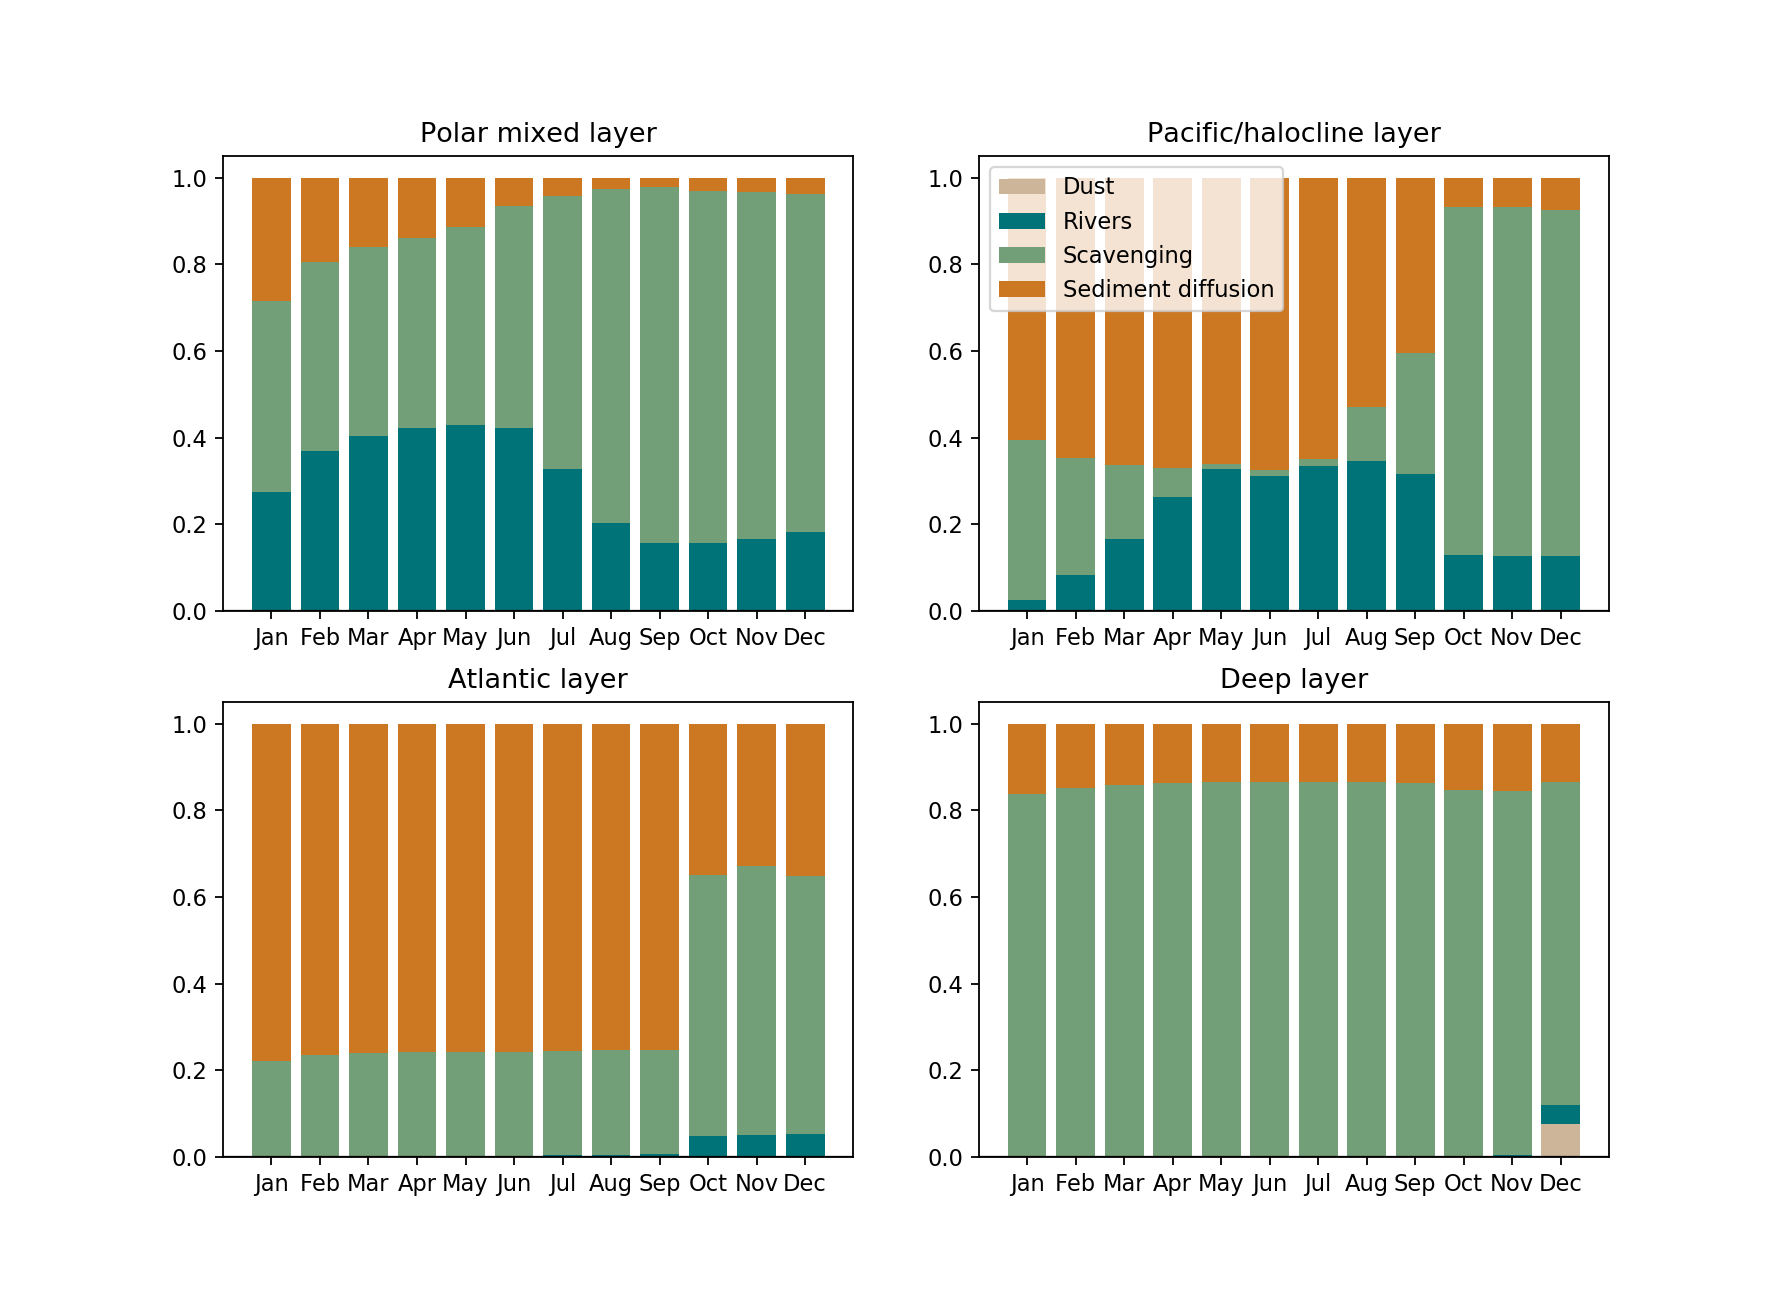

In [200]:
fig, ax = plt.subplots(2,2, figsize=(11,8))
proportions_bar(fig, ax[0,0], PML_dust_sum_ave, PML_rivers_sum_ave, PML_scav_sum_ave, PML_sed_sum_ave, \
               'Polar mixed layer')
proportions_bar(fig, ax[0,1], PW_dust_sum_ave, PW_rivers_sum_ave, PW_scav_sum_ave, PW_sed_sum_ave, \
               'Pacific/halocline layer', legend=True)
proportions_bar(fig, ax[1,0], AW_dust_sum_ave, AW_rivers_sum_ave, AW_scav_sum_ave, AW_sed_sum_ave, \
               'Atlantic layer')
proportions_bar(fig, ax[1,1], DW_dust_sum_ave, DW_rivers_sum_ave, DW_scav_sum_ave, DW_sed_sum_ave, \
               'Deep layer')

# Things to look at:
- individual water masses component contribution
- shorter time scale component contributions